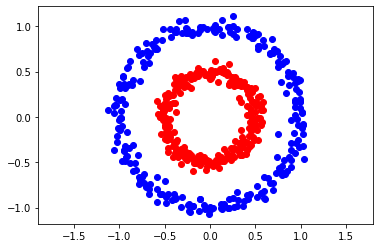

In [19]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n = 500 # number of samples
p = 2 # 2 input features (neurons)
X,Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05) # X is data points, Y is type of data point, 0 is blue , 1 is red
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "blue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "red")
plt.axis('equal')
plt.show()

In [20]:
class neural_layer:#
    """Class to create neural layer objects."""
    def __init__(self,n_conn,n_neur, act_f): #initialize class with number of connections from previous layer, number of neurons in actual layer, activation function
        self.act_f = act_f #activation function object
        self.b = np.random.rand(1,n_neur) * 2 - 1 #bias vector from -1 to 1
        self.W = np.random.rand(n_conn,n_neur) * 2 - 1 # Weight matrix from -1 to 1

Text(0.5, 1.0, 'Relu')

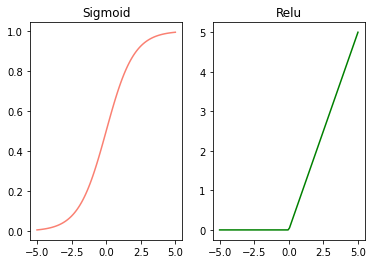

In [21]:
class act_F:
    """Activation functions used in forward and backward pass."""
    relu = lambda x: np.maximum(0, x) 
    sigmoid = (lambda x: 1 / (1 + np.e ** (-x)) , lambda x: x * (1 - x) ) # sigmoid and its derivative

xaxis = np.linspace(-5, 5, 100)
plt.subplot(1, 2, 1)
plt.plot(xaxis,act_F.sigmoid[0](xaxis),'salmon')
plt.title("Sigmoid")

plt.subplot(1, 2, 2)
plt.plot(xaxis,act_F.relu(xaxis),'green')
plt.title("Relu")


In [22]:

def create_nn(topology,act_f):
    nn= []
    for lay, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[lay], topology[lay + 1],act_f))
    return nn

In [23]:
topology = [p, 4, 8, 1]# number of neurons on each layer
neural_net = create_nn(topology,act_F.sigmoid)
cost = (lambda Yp, Yr : np.mean((Yp - Yr) ** 2 ), lambda Yp, Yr : (Yp-Yr))# mean square error of predictions vs result and its derivative dC/daL 

def train(neural_net, X, Y, cost, lr= 0.5, train=True):
    #Forward Pass
    out = [(None, X)] #first layer starts with no weighted sum, and the activation input vector X
    for lay, layer in enumerate(neural_net):
        W , b = neural_net[lay].W , neural_net[lay].b #weights and bias
        act = out[-1][1] 
        z = act @ W + b #weighted sum
        a = neural_net[lay].act_f[0](z) # activation of Weighted sum
        out.append((z,a))  
    #print(cost[0](out[-1][1],Y))

    if train:
        #Backward Pass
        deltas = []
        for lay in reversed(range(0, len(neural_net))):
            z = out[lay + 1][0]
            a = out[lay + 1][1]
            #print("Layer "+str(lay),a.shape)
            if lay == len(neural_net) - 1: #if we are in the last layer
                dC_dzL = cost[1](a, Y) * neural_net[lay].act_f[1](a) #dC/daL * daL/dzL
                deltas.insert(0, dC_dzL)
            else:
                dC_dzLm1= deltas[0] @ _W.T * neural_net[lay].act_f[1](a) #dC/dzL(*)WL *daL/dzL
                deltas.insert(0, dC_dzLm1)
            _W = neural_net[lay].W    
            #Gradient Descent:
            neural_net[lay].b = neural_net[lay].b - np.mean(deltas[0],axis= 0, keepdims = True) * lr
            neural_net[lay].W = neural_net[lay].W - out[lay][1].T @ deltas[0] * lr
    return out[-1][1]
train(neural_net, X, Y, cost, 0.5, True)
print("")

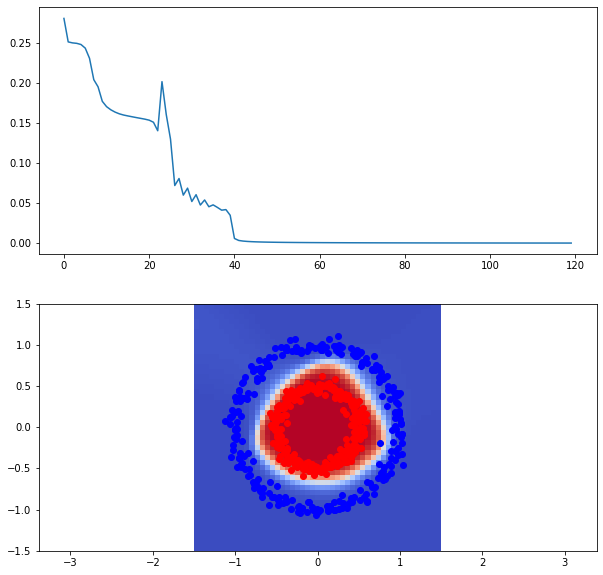

In [24]:
import time
from IPython.display import clear_output
%matplotlib inline
neural_n = create_nn(topology,act_F.sigmoid)
loss= []
for i in range(3000): 
    pY = train(neural_n, X, Y, cost, lr = 0.05)
    if i % 25 == 0:
        loss.append(cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        for i0,x0 in enumerate (_x0):
            for i1, x1 in enumerate (_x1):
                _Y[i0, i1]= train(neural_n, np.array([[x0, x1]]), Y, cost, train = False)[0][0]
        
        fig, axs = plt.subplots(2)
        fig.set_figwidth(10)
        fig.set_figheight(10)
        axs[0].plot(range(len(loss)),loss)
        axs[1].pcolormesh(_x0, _x1,_Y,cmap="coolwarm")
        axs[1].axis("equal")
        axs[1].scatter(X[Y[:, 0] == 0, 0],X[Y[:, 0] == 0, 1], c = "blue")
        axs[1].scatter(X[Y[:, 0] == 1, 0],X[Y[:, 0] == 1, 1], c = "red")
        clear_output(wait = True)
        plt.show()
        time.sleep(0.1)
